<a href="https://colab.research.google.com/github/HeribertoGodoy/Tareas-EIE-401-/blob/main/Actividades/Actividad%206/Actividad_6_GodoyHeriberto_203197551.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 6</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Heriberto Godoy</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones para extracción de características.

### 1.1 Con un audio (voz o música) no mayor a 30 segundos, utilizando la libreria Librosa (https://librosa.org/), numpy, pytorch, implementa operaciones fundamentales como:
- Media
- Kurtosis
- Skewness
- Zero Crossing Rate
- Spectral Centroid
- Energía
- RMSE
- Frecuencia fundamental
<p align="justify">
Estas operaciones son fundamentales en el proceso de extracción de características. Explica el resultado obtenido y que significa cada uno.

Media: -4.499789065448567e-05
Kurtosis: 1.6983604456969337
Skewness: 0.007864706617308806
Zero Crossing Rate: 0.03414446599753227
Spectral Centroid: 615.7012971508506
Energía: 14880.751953125
RMSE: 0.13832704722881317
Frecuencia Fundamental: -0.020000000000000018


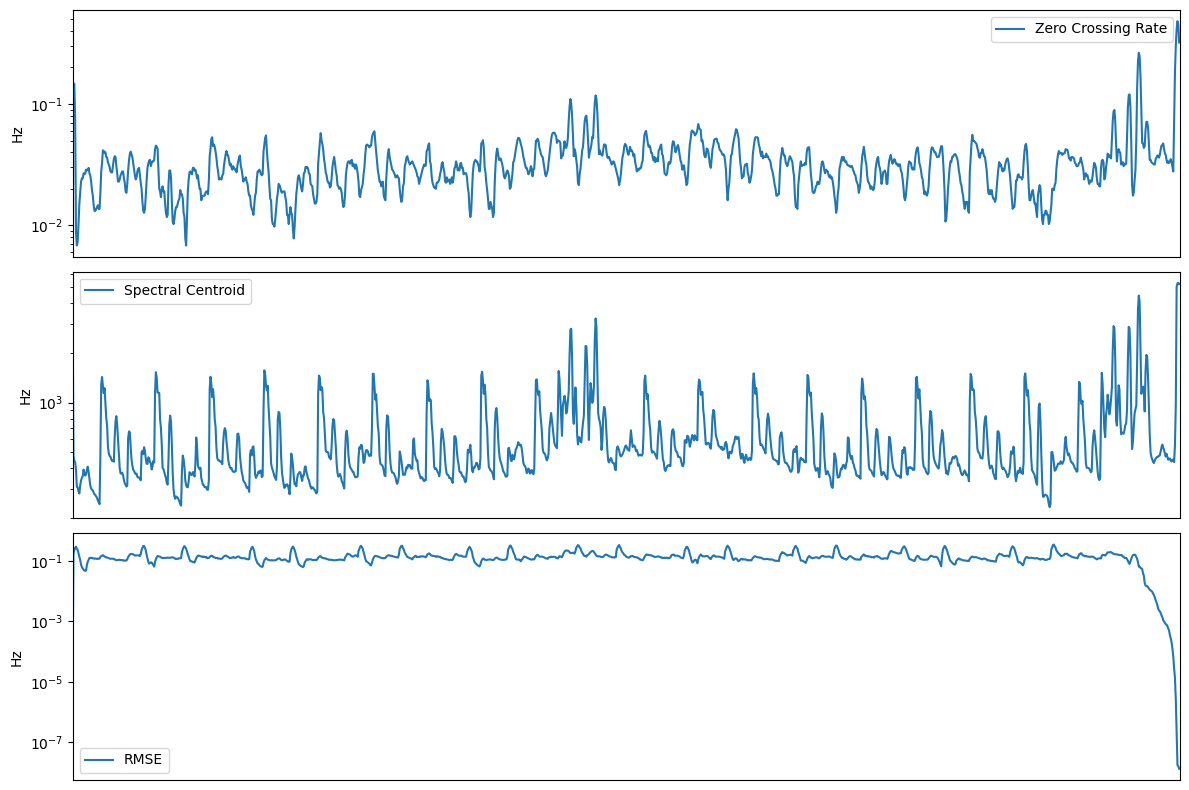

In [26]:
import librosa
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Cargar el archivo de audio
audio_path = '/content/depositphotos_680237012-track-soft-going-peaceful-lounge-music.mp3'
y, sr = librosa.load(audio_path)

# Calcular las características
media = np.mean(y)
kurtosis = scipy.stats.kurtosis(y)
skewness = scipy.stats.skew(y)
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)[0]
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
energia = np.sum(y**2)
rmse = librosa.feature.rms(y=y)[0]
frecuencia_fundamental = librosa.pitch_tuning(y)

# Imprimir los valores de las características
print(f'Media: {media}')
print(f'Kurtosis: {kurtosis}')
print(f'Skewness: {skewness}')
print(f'Zero Crossing Rate: {np.mean(zero_crossing_rate)}')
print(f'Spectral Centroid: {np.mean(spectral_centroid)}')
print(f'Energía: {energia}')
print(f'RMSE: {np.mean(rmse)}')
print(f'Frecuencia Fundamental: {frecuencia_fundamental}')

# Graficar las características visuales
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.semilogy(zero_crossing_rate.T, label='Zero Crossing Rate')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, zero_crossing_rate.shape[-1]])
plt.legend()

plt.subplot(3, 1, 2)
plt.semilogy(spectral_centroid.T, label='Spectral Centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spectral_centroid.shape[-1]])
plt.legend()

plt.subplot(3, 1, 3)
plt.semilogy(rmse.T, label='RMSE')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rmse.shape[-1]])
plt.legend()

plt.tight_layout()
plt.show()


## 2. Implementaciones

### 2.1 Utilizando Pytorch Audio obtenga el espectrograma del audio original
El espectrograma debe producirse para valores número de muestras para la transformada rápida de fourier de  32, 128, 512.


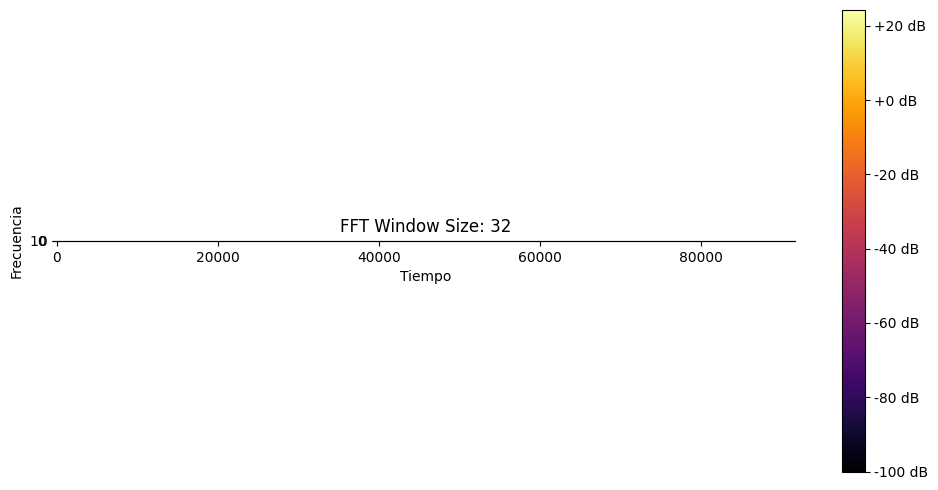

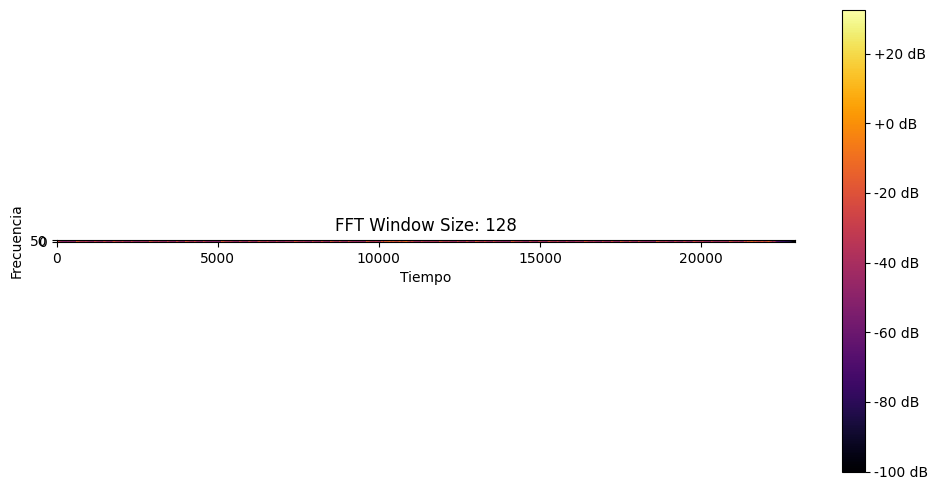

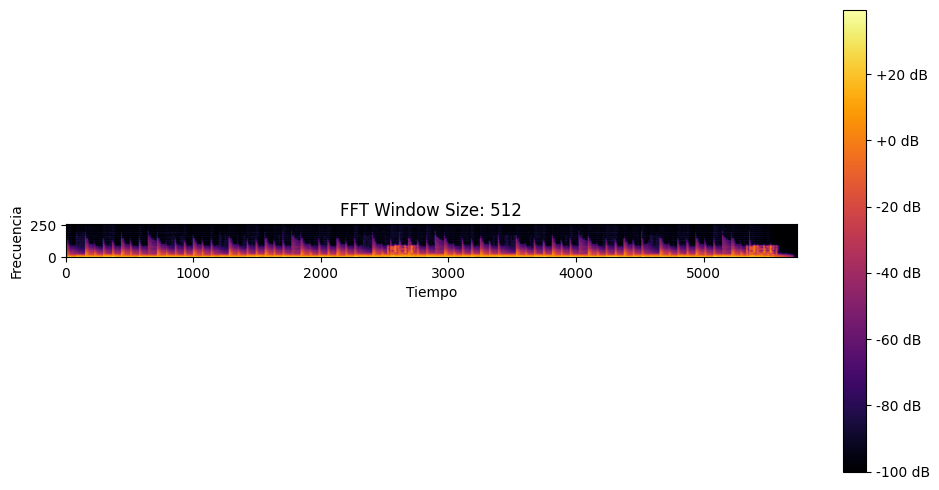

In [27]:
import torch
import torchaudio
import matplotlib.pyplot as plt

# Cargar el archivo de audio
audio_path = "/content/depositphotos_680237012-track-soft-going-peaceful-lounge-music.mp3"
waveform, sample_rate = torchaudio.load(audio_path)

# Convertir el audio a mono si es estéreo
if waveform.size(0) > 1:
    waveform = torch.mean(waveform, dim=0, keepdim=True)

# Especificar los tamaños de ventana para la FFT
window_sizes = [32, 128, 512]

# Calcular y graficar el espectrograma para cada tamaño de ventana
for window_size in window_sizes:
    plt.figure(figsize=(10, 5))

    # Calcular el espectrograma
    specgram = torchaudio.transforms.Spectrogram(
        n_fft=window_size, hop_length=window_size//2)(waveform)

    # Convertir a decibeles
    specgram_db = torchaudio.transforms.AmplitudeToDB()(specgram)

    # Mostrar el espectrograma
    plt.imshow(specgram_db[0].numpy(), cmap='inferno', origin='lower')
    plt.title(f'FFT Window Size: {window_size}')
    plt.xlabel('Tiempo')
    plt.ylabel('Frecuencia')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()


### 3. Audio Processing
### 3.1 En matlab, del paquete de procesamiento de audio, debes elegir una función de la librería, estudiarla y hacer un ejemplo.

Debes enviar un informe en PDF de 1 (una) página explicando, el algoritmo seleccionado, como funciona y el ejemplo que desarrollaste. Incluye por lo menos un gráfico que demuestre el trabajo realizado.

Debes subir a tu repositorio el código en matlab con dicha solución.

En el sitio  https://la.mathworks.com/help/audio/index.html?s_tid=CRUX_lftnav y https://la.mathworks.com/help/audio/audio-processing-algorithm-design.html, encuentras diferentes funciones para generar efectos como reverberancia o control de la onda (compresores, gates, etc)

Así mismo, en el sitio https://la.mathworks.com/help/signal/measurements-and-feature-extraction.html, encuentras ejemplos para extracción de caracteristicas de la señal de audio, por ejemplo métricas de pulso y de transición.


    

## 5. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[MFCC]https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779

[Cepstrum]https://www.kuniga.me/blog/2021/12/11/pitch-via-cepstrum.html

[LPC] https://www.youtube.com/watch?v=DIr6SPdK4NA

[LPC] https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

[MFCC] https://librosa.org/doc/0.10.1/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

[MFCC] https://pytorch.org/audio/main/generated/torchaudio.transforms.MFCC.html
